## Importing Libraries and Tools

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st
import numpy as np
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)

## Loading Dataset

In [3]:
df = pd.read_excel('Sample - Superstore.xls')
df_furniture = pd.DataFrame(df[df['Category'] == 'Furniture'])
col = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']

## Data Preprocessing

In [4]:
df_furniture.drop(col,axis=1,inplace=True)
df_furniture.sort_values(by=['Order Date'],ascending=False)

,Order Date,Sales
906,2017-12-30,323.136
5457,2017-12-29,68.460
7636,2017-12-29,258.750
1877,2017-12-29,393.568
7632,2017-12-29,1207.840
...,...,...
4938,2014-01-13,333.999
716,2014-01-11,9.940
866,2014-01-10,51.940
7660,2014-01-07,76.728


In [5]:
df_furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
furn = df_furniture.groupby(by='Order Date')['Sales'].sum().reset_index()
furn

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [7]:
furn.set_index('Order Date',inplace=True)
furn.sort_values(by=['Sales'],ascending=False)

,Sales
Order Date,
2015-09-17,10006.174
2016-12-25,6636.863
2015-12-01,6600.680
2017-09-20,5496.174
2014-11-17,5270.080
...,...
2014-06-24,4.272
2014-08-23,4.224
2017-03-20,2.910


In [8]:
z = furn['Sales'].resample('MS').mean()
z['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

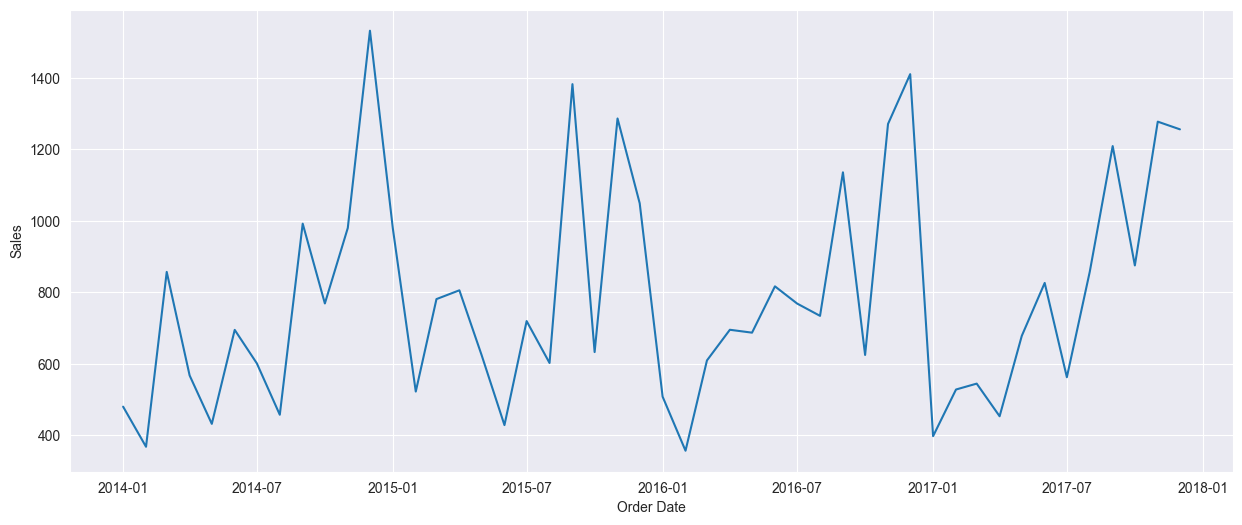

In [9]:
plt.figure(figsize=(15,6))
sns.lineplot(z)
plt.show()

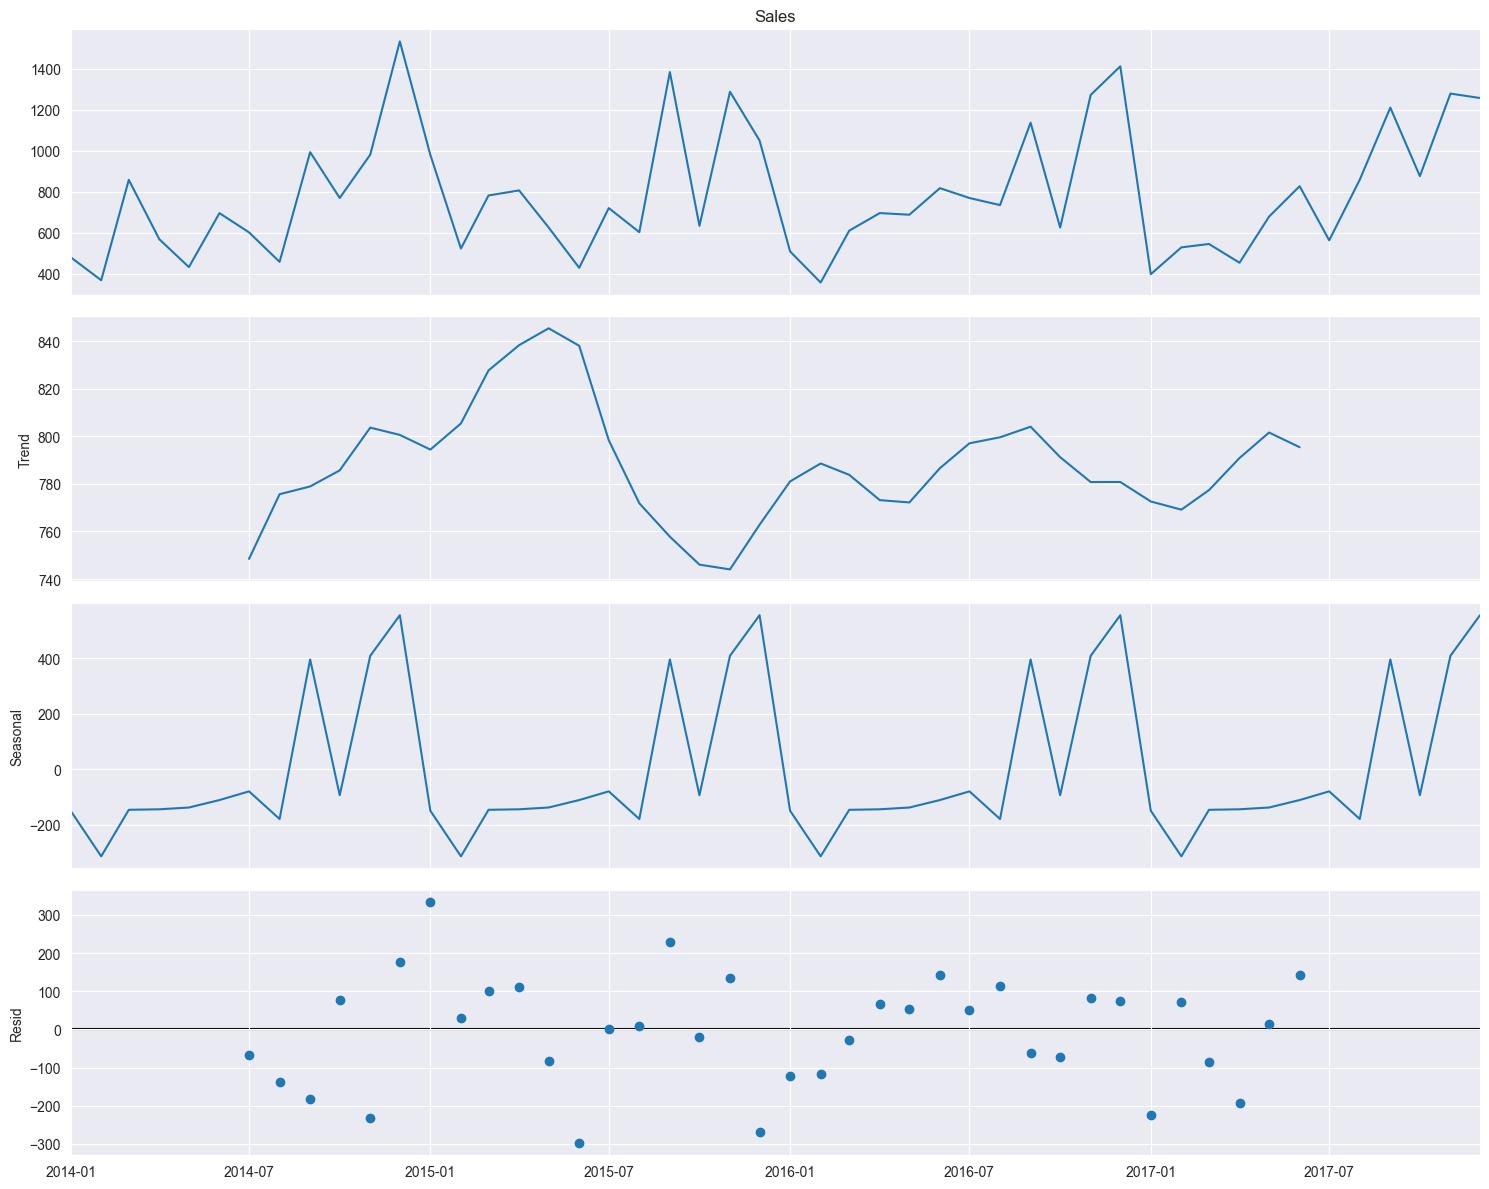

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,12
decomp = st.tsa.seasonal_decompose(z,model='additive')
fig = decomp.plot()
plt.show()

In [11]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(z[0],z[1],z[2],12) for z in list(itertools.product(p,d,q))]
print('S ARIMA X: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('S ARIMA X: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('S ARIMA X: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('S ARIMA X: {} x {}'.format(pdq[2],seasonal_pdq[4]))

S ARIMA X: (0, 0, 1) x (0, 0, 1, 12)
S ARIMA X: (0, 0, 1) x (0, 1, 0, 12)
S ARIMA X: (0, 1, 0) x (0, 1, 1, 12)
S ARIMA X: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for para in pdq:
    for para_seasonal in seasonal_pdq:
        mod = st.tsa.statespace.SARIMAX(z,order = (1,1,1),
        seasonal_order = (1,1,0,12),        
        enforce_invertibility=False)
        res = mod.fit()
        print('ARIMA Model {}x{}12 - AIC:{}'.format(para,para_seasonal,res.aic))

ARIMA Model (0, 0, 0)x(0, 0, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(0, 0, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(0, 1, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(0, 1, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(1, 0, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(1, 0, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(1, 1, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 0)x(1, 1, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(0, 0, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(0, 0, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(0, 1, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(0, 1, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(1, 0, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(1, 0, 1, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(1, 1, 0, 12)12 - AIC:486.5631981200081
ARIMA Model (0, 0, 1)x(1, 1, 1, 12)12 - AIC:486.5631981200081
ARIMA Mo

In [13]:
print(res.mle_retvals)

{'fopt': 4.985033313750084, 'gopt': array([ 8.21565038e-07,  6.14708284e-07, -1.58806301e-07,  6.57252030e-09]), 'fcalls': 185, 'warnflag': 0, 'converged': True, 'iterations': 28}


In [14]:
mod = st.tsa.statespace.SARIMAX(z,order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_invertibility=False)
res = mod.fit()
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


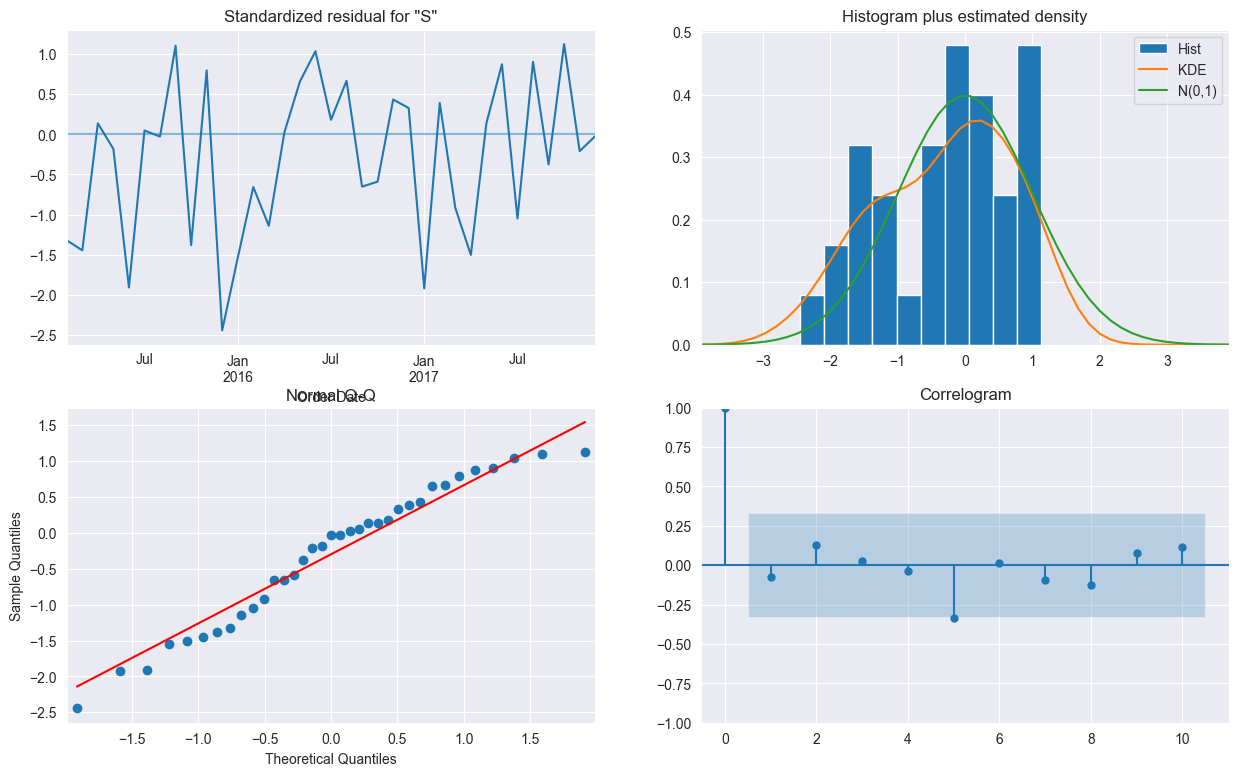

In [15]:
res.plot_diagnostics(figsize=(15,9))
plt.show()

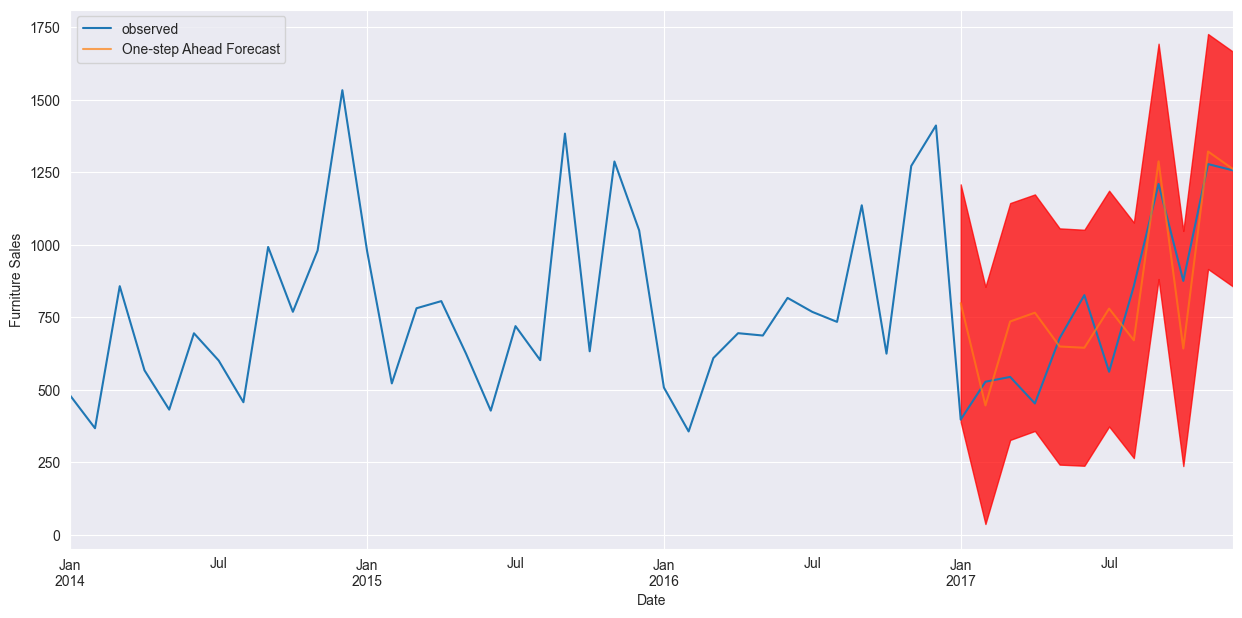

In [16]:
pred = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_conf = pred.conf_int()
ax = z['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step Ahead Forecast',alpha=0.7,figsize=(15,7))
ax.fill_between(pred_conf.index,pred_conf.iloc[:,0],pred_conf.iloc[:,1],color='r',alpha=0.75)
ax.set_ylabel('Furniture Sales')
ax.set_xlabel('Date')
plt.legend()
plt.show()

In [17]:
z_fore = pred.predicted_mean
z_truth = z['2017-01-01':]
mse = ((z_fore - z_truth)**2).mean()
print('MSE for the forecast: {}'.format(round(mse,2)))
print('RMSE for the forecast: {}'.format(round(np.sqrt(mse),2)))

MSE for the forecast: 39996.01
RMSE for the forecast: 199.99


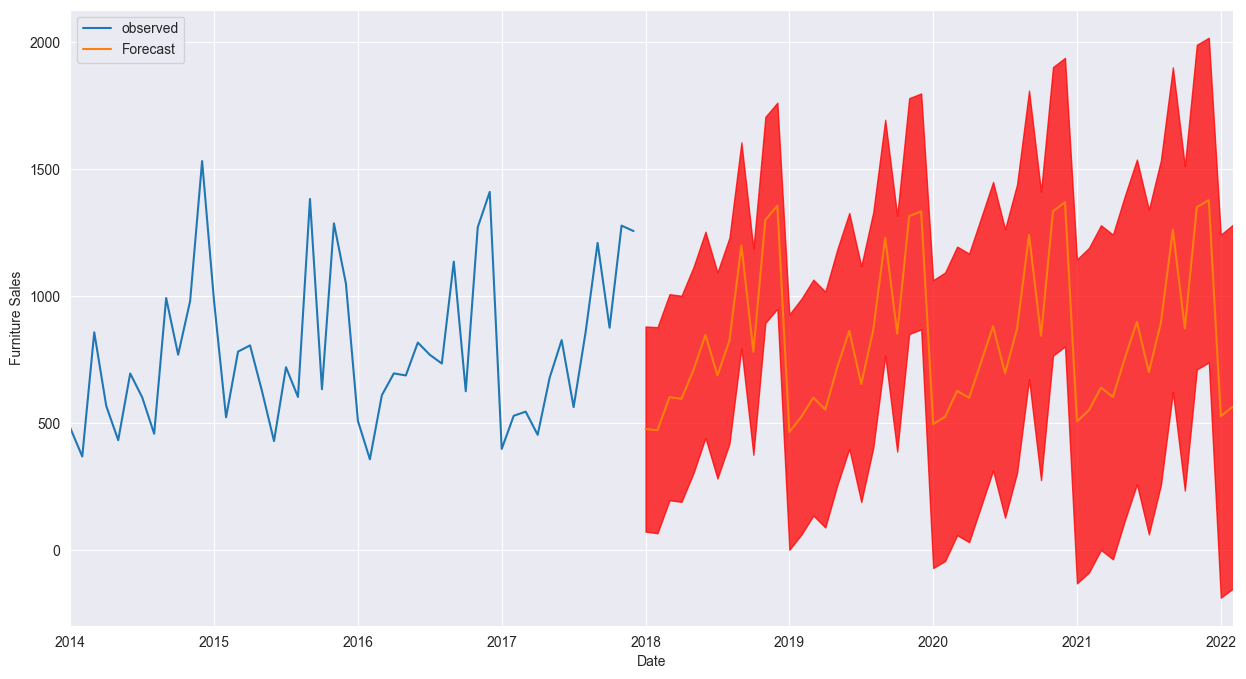

In [18]:
pred_uc = res.get_forecast(steps=50)
pred_conf = pred_uc.conf_int()
ax = z.plot(label='observed',figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_conf.index,pred_conf.iloc[:,0],pred_conf.iloc[:,1],color='r',alpha=0.75)
ax.set_ylabel('Furniture Sales')
ax.set_xlabel('Date')
plt.legend()
plt.show()